# Implementation: Swarm Sampling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from parallel_tempering import energy, f

#### Running the code for a given number of chains and epochs

In [3]:
num_chains = 6
num_epochs = 10000

In [4]:
! mpiexec -n {num_chains} python -m mpi4py parallel_tempering_respawn.py {num_epochs}

Agent 4 [T =6] accepted: 92.33%, received: 95.96%, respawned: 2.51%
Agent 3 [T =4.5] accepted: 90.02%, received: 88.89%, respawned: 1.00%
Agent 1 [T =1.5] accepted: 81.47%, received: 83.84%, respawned: 0.25%
Agent 0 [T =1] accepted: 78.18%, received: 85.86%, respawned: 0.00%
Total time elapsed: 80.10 sec
Agent 2 [T =3] accepted: 88.15%, received: 88.89%, respawned: 0.50%
Agent 5 [T =7.5] accepted: 93.75%, received: 0.00%, respawned: 6.02%


In [5]:
#! mpiexec -n {num_chains} python -m mpi4py parallel_tempering.py {num_epochs}

#### Loading in the results

In [6]:
all_results = np.zeros(shape=(num_chains, num_epochs, 2))

for i in range(num_chains):
    all_results[i] = np.load(f'results/process_{i}.npy')
    
print(all_results.shape)

(6, 10000, 2)


#### Plotting the results

In [7]:
mu0, mu1, mu2, mu3 = -10,0,10,30
sig0, sig1, sig2, sig3 = 1, 2, 2, 1

# target distribution: difficult normal case
f = lambda x: 0.25*norm(mu0, sig0).pdf(x) + 0.25*norm(mu1, sig1).pdf(x) + 0.25*norm(mu2, sig2).pdf(x) + 0.25*norm(mu3, sig3).pdf(x)


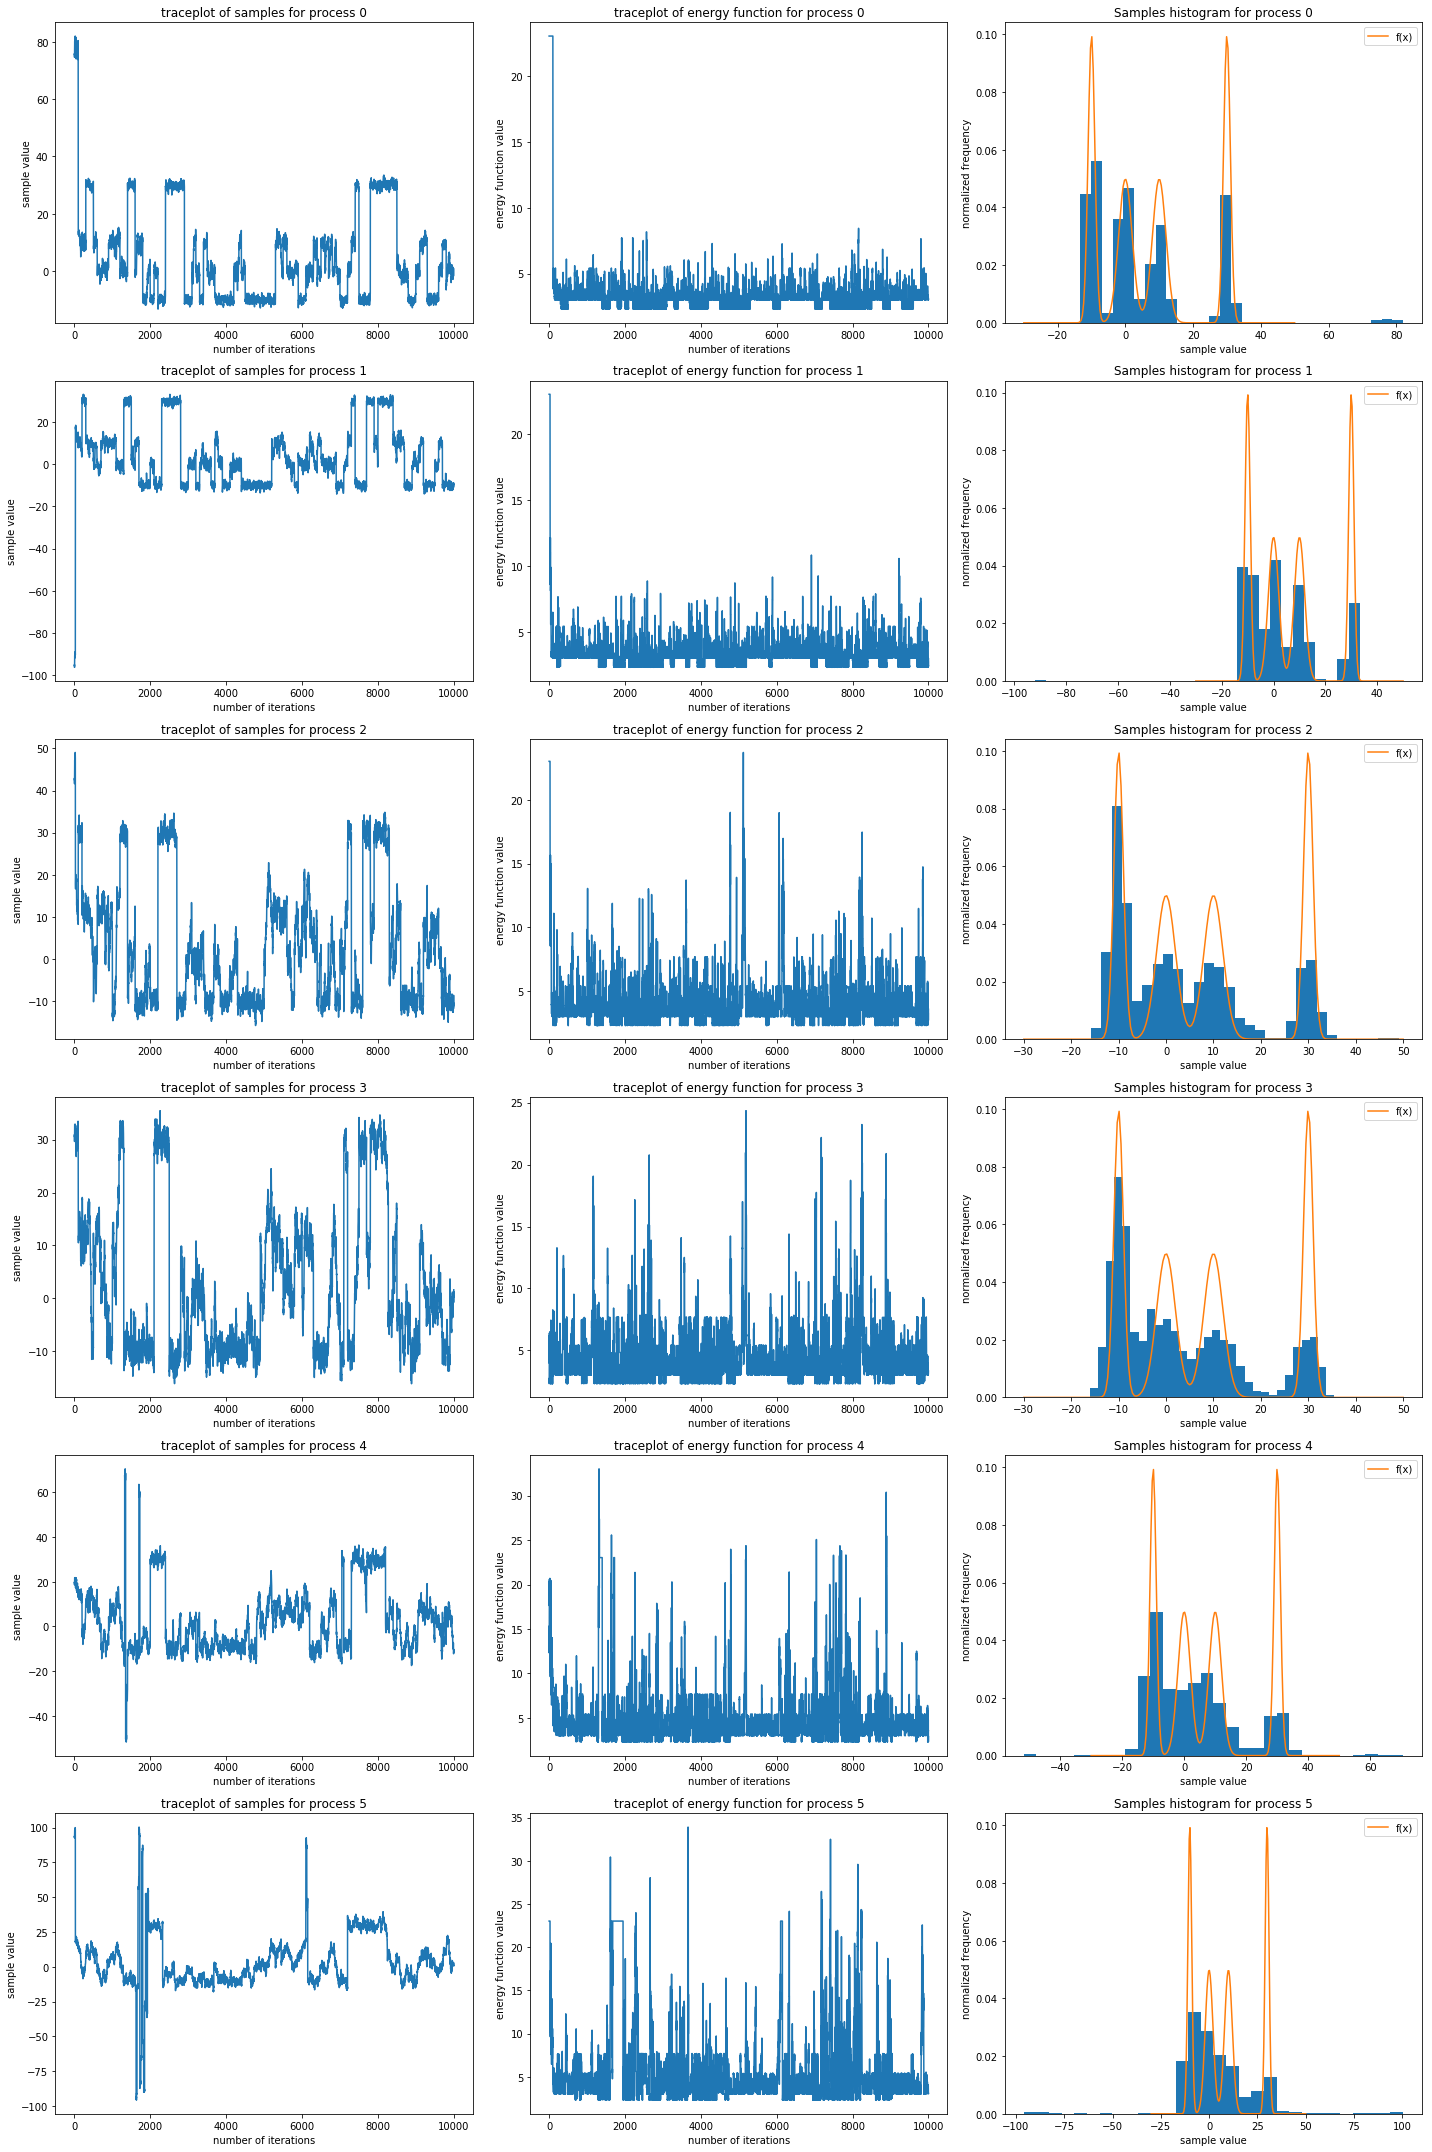

In [8]:
xgrid = np.linspace(-30,50,200)
fig, ax = plt.subplots(nrows=num_chains, ncols=3, figsize=(20,5*num_chains))
ax = ax.ravel()

for i in range(num_chains):
    accumulator = all_results[i]
    ax[3*i+0].plot(range(num_epochs), accumulator[:,0])
    ax[3*i+0].set_title(f'traceplot of samples for process {i}')
    ax[3*i+0].set_ylabel('sample value')
    ax[3*i+0].set_xlabel('number of iterations')

    ax[3*i+1].plot(range(num_epochs), accumulator[:,1])
    ax[3*i+1].set_title(f'traceplot of energy function for process {i}')
    ax[3*i+1].set_ylabel('energy function value')
    ax[3*i+1].set_xlabel('number of iterations')

    ax[3*i+2].hist(accumulator[:,0], bins=30, density=True)
    ax[3*i+2].plot(xgrid, f(xgrid), label='f(x)')
    ax[3*i+2].set_title(f'Samples histogram for process {i}')
    ax[3*i+2].set_ylabel('normalized frequency')
    ax[3*i+2].set_xlabel('sample value')
    ax[3*i+2].legend()
fig.tight_layout()

In [16]:
! mpiexec -n {num_chains} python -m mpi4py parallel_tempering.py {num_epochs}

Agent 4 [T =6] accepted: 94.40%, exchange: 98.99%
Agent 0 [T =1] accepted: 78.95%, exchange: 67.68%
Total time elapsed: 79.82158184051514 seconds
Agent 2 [T =3] accepted: 91.10%, exchange: 81.82%
Agent 5 [T =7.5] accepted: 94.79%, exchange: 0.00%
Agent 1 [T =1.5] accepted: 85.19%, exchange: 76.77%
Agent 3 [T =4.5] accepted: 93.54%, exchange: 94.95%


#### Loading in the results

In [17]:
all_results = np.zeros(shape=(num_chains, num_epochs, 2))

for i in range(num_chains):
    all_results[i] = np.load(f'results/process_{i}.npy')
    
print(all_results.shape)

(6, 10000, 2)


#### Plotting the results

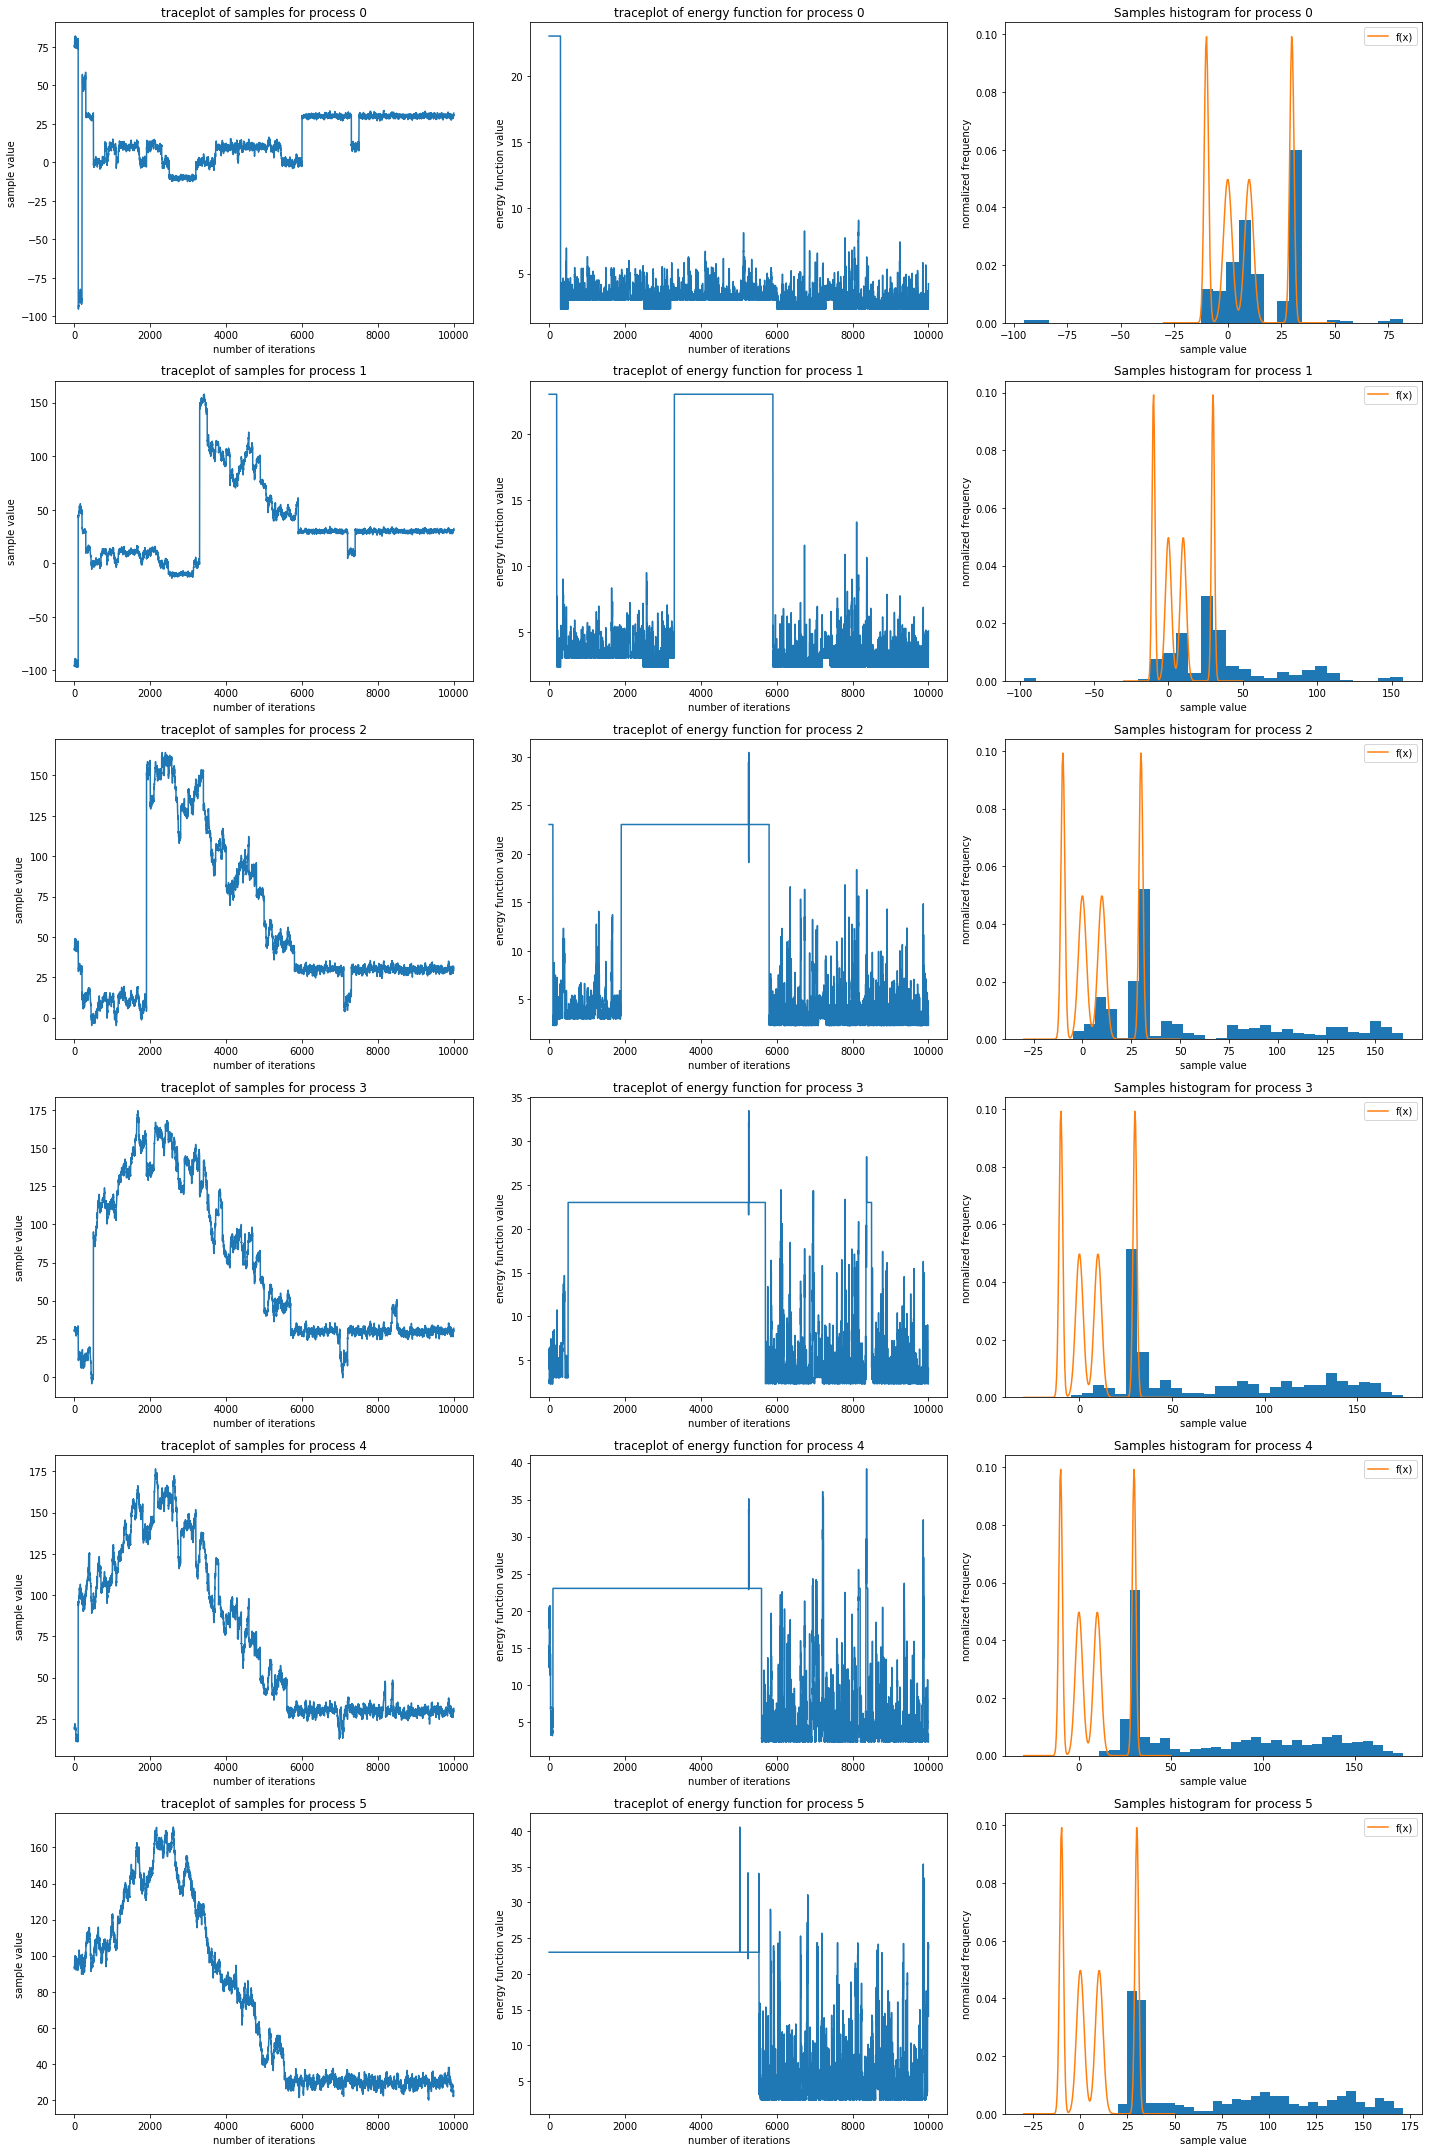

In [18]:
xgrid = np.linspace(-30,50,200)
fig, ax = plt.subplots(nrows=num_chains, ncols=3, figsize=(20,5*num_chains))
ax = ax.ravel()

for i in range(num_chains):
    accumulator = all_results[i]
    ax[3*i+0].plot(range(num_epochs), accumulator[:,0])
    ax[3*i+0].set_title(f'traceplot of samples for process {i}')
    ax[3*i+0].set_ylabel('sample value')
    ax[3*i+0].set_xlabel('number of iterations')

    ax[3*i+1].plot(range(num_epochs), accumulator[:,1])
    ax[3*i+1].set_title(f'traceplot of energy function for process {i}')
    ax[3*i+1].set_ylabel('energy function value')
    ax[3*i+1].set_xlabel('number of iterations')

    ax[3*i+2].hist(accumulator[:,0], bins=30, density=True)
    ax[3*i+2].plot(xgrid, f(xgrid), label='f(x)')
    ax[3*i+2].set_title(f'Samples histogram for process {i}')
    ax[3*i+2].set_ylabel('normalized frequency')
    ax[3*i+2].set_xlabel('sample value')
    ax[3*i+2].legend()
fig.tight_layout()